In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.4MB/s 


In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from tqdm.notebook import tqdm


Using TensorFlow backend.


## **The Grid-Creating Process**

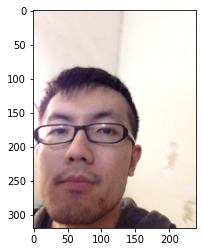

In [ ]:
# set the path to a random image for test
path = 'drive/My Drive/Colab Notebooks/Theses/ETE/Data Samples/MTCNN Miniset/Images/09003.jpg'
# read the image
img = plt.imread(path)
# plot the image
plt.imshow(img);


In [ ]:
# detect face keypoints using MTCNN
results = MTCNN().detect_faces(img)
results

[{'box': [-2, 99, 148, 203],
  'confidence': 0.9999983310699463,
  'keypoints': {'left_eye': (37, 173),
   'mouth_left': (37, 253),
   'mouth_right': (93, 256),
   'nose': (65, 209),
   'right_eye': (105, 177)}}]

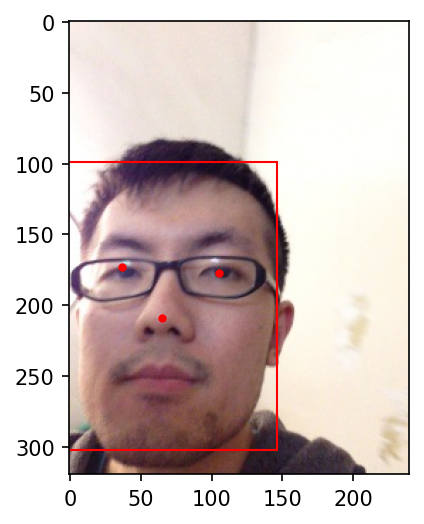

In [ ]:
# set the plot and axis
plt.figure(dpi=150)
ax = plt.gca()
# get the face bounding box parameters
x, y, width, height = results[0]['box']
# create a rectangle patch for the face bounding box
rect = Rectangle((x, y), width, height, fill=False, color='red')
# add the patch to the plot
ax.add_patch(rect)
# create a dictionary of the eyes and nose keypoints (ignore the mouth)
keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
# mark the keypoints on the image with red dots
for key, val in keypoints.items():
    plt.plot(val[0],val[1],'r.')
# and plot the image
plt.imshow(img);

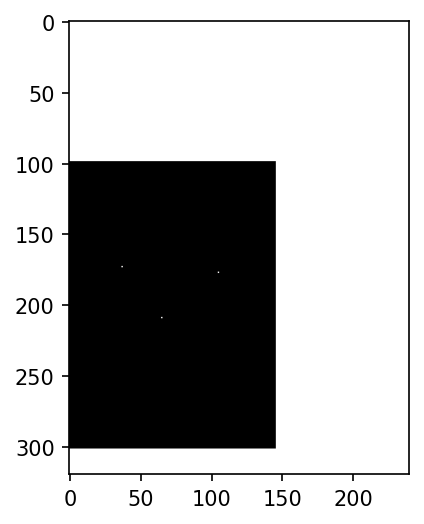

In [ ]:
# create the grid
# ---------------------
# set the plot and axis
plt.figure(dpi=150)
ax = plt.gca()
# set a white canvas with the same dimensions as the image
canvas = np.ones((320,240)) * 255
# get the face bounding box parameters
x, y, width, height = results[0]['box']
# blacken all the pixels falling in the face bounding box
canvas[y:y+height, x:x+width] = 0
# get the keypoints for eyes and nose while ignoring the mouth two points
keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
# whiten the keypoints
for key, val in keypoints.items():
    canvas[val[1],val[0]]=255

# plot the grid, and
plt.imshow(canvas, cmap='gray');
# finally save it
plt.imsave(path[:-16]+'Grids/'+path[-9:], canvas, cmap='gray')

## **Grid Creator**

In [ ]:
# define a function for making facial grid of an image
def grid_creator(path):
    '''
    The function takes a path (string) to an image (320,240) of a face 
    using the MTCNN computes its facial landmarks, creates a white canvas
    of the same size as the original image and marks the facial landmarks
    with black face-box and white dots for eyes and nose, and saves the
    canvas (the gird) with the same name in the Grids folder. 
    '''
    # read the image
    img = plt.imread(path)
    # detect face keypoints using MTCNN
    results = MTCNN().detect_faces(img)
    # set a white canvas with the same dimensions as the image
    canvas = np.ones((320,240)) * 255
    # get the face bounding box parameters
    x, y, width, height = results[0]['box']
    # blacken all the pixels falling in the face bounding box
    canvas[y:y+height, x:x+width] = 0
    # get the keypoints for eyes and nose while ignoring the mouth two points
    keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
    # whiten the keypoints
    for key, val in keypoints.items():
        canvas[val[1],val[0]]=255
    # finally save it
    plt.imsave(path[:-16]+'Grids/'+path[-9:], canvas, cmap='gray')

In [ ]:
# run the grid-creator on the files in the image folder
# ------------------------------------------------------------------------------
# set the path to the images folder
path_dir = 'drive/My Drive/Colab Notebooks/Theses/ETE/Data Samples/MTCNN Miniset/Images/'
# list the images in the folder
images = [name for name in os.listdir(path_dir)]

# for each image in the folder...
for image in tqdm(images):
    # set the path to the image
    path = path_dir + image
    # create and save the grid
    grid_creator(path)
